# Automobile Dataset
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/Automobile_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/automobile.csv)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve,validation_curve
import sys
from io import StringIO
from sklearn.linear_model import SGDClassifier

In [45]:
names=['symboling','norm_losses','brand','fuel','aspiration','doors','body_style','drive_wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
data = pd.read_csv('../../Lab1/Romil/Data/processed_data_Automobile.csv',header=None,names = names,)
data.head()



,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


** Converting all the categorical data into numeric through one hot encoding.**
```
Because all the categorical data are in string format. Attribute having string format will not work in linearregression as it works with matrix multiplication.
```

In [5]:
data_dummy = pd.get_dummies(data)
y = data.price.values

In [6]:
data_dummy.dtypes

symboling                    int64
norm_losses                  int64
wheel-base                 float64
length                     float64
width                      float64
height                     float64
curb-weight                  int64
engine-size                  int64
bore                       float64
stroke                     float64
compression-ratio          float64
horsepower                   int64
peak-rpm                   float64
city-mpg                     int64
highway-mpg                  int64
price                        int64
brand_alfa-romero            uint8
brand_audi                   uint8
brand_bmw                    uint8
brand_chevrolet              uint8
brand_dodge                  uint8
brand_honda                  uint8
brand_isuzu                  uint8
brand_jaguar                 uint8
brand_mazda                  uint8
brand_mercedes-benz          uint8
brand_mercury                uint8
brand_mitsubishi             uint8
brand_nissan        

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_dummy, y, test_size=0.33, random_state=42)

In [8]:
X_train.shape

(137, 76)

In [9]:
y_train

array([22018, 10345,  6938, 18150,  7603,  6095, 16695,  9538, 12945,
       12764,  6669,  7957,  7609, 18620, 16845, 18150, 16500,  6189,
       11048,  7609, 34028,  6989,  5118,  7295, 17075, 10595,  6377,
       15510, 13845,  6529, 16925, 18950,  8058, 17710,  8558, 32528,
       15985,  7126, 17450,  5399, 12440,  9495, 16630,  8013, 16430,
       10245,  5572,  5348, 11199, 13495,  7995,  7975, 31600, 22470,
       11245, 13207,  9298,  8921, 10295, 13200,  8921,  7957,  8778,
       11595,  8499,  8845, 17669, 32250,  7299,  7898,  6785,  7775,
       13950, 19699,  6695, 12170,  8195,  8358,  9980, 36000,  9959,
        7129, 18920, 13860,  6649, 14869, 15750,  8495,  5499, 23875,
       21105,  8845, 10898,  9895, 36880, 35056, 15690, 15040, 11549,
       18420, 10795,  7395, 11900,  5195, 19045,  9989, 15645, 35550,
        9279,  5572, 13645,  7738, 16515, 13207,  7895,  7198, 12290,
       16500,  6795, 11694,  9295,  6338, 13499,  8949, 17950,  9279,
       45400,  6692,

### Linear regression on all features

In [10]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [11]:
reg.score(X_test,y_test)

1.0

In [12]:
y_pred = reg.predict(X_test)

In [13]:
metrics.mean_absolute_error(y_test,y_pred)

3.036107313271393e-12

In [14]:
metrics.mean_squared_error(y_test,y_pred)

1.8940003143309767e-23

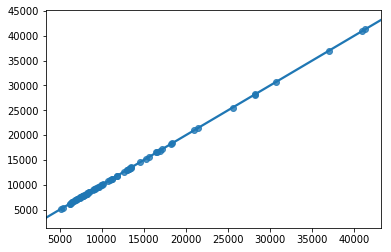

In [15]:
sns.regplot(y_test,y_pred)

### Linear regression on selected features

In [16]:
data_new = data.drop(['symboling','doors','norm_losses','height','compression-ratio','price'],axis= 1)

In [17]:
df_dummy = pd.get_dummies(data_new)

In [18]:
df_dummy.head()


,wheel-base,length,width,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,130,3.47,2.68,111,5000.0,21,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,2.68,111,5000.0,21,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,3.47,154,5000.0,19,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,3.40,102,5500.0,24,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,3.40,115,5500.0,18,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df_dummy.columns

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'brand_alfa-romero', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
       'brand_dodge', 'brand_honda', 'brand_isuzu', 'brand_jaguar',
       'brand_mazda', 'brand_mercedes-benz', 'brand_mercury',
       'brand_mitsubishi', 'brand_nissan', 'brand_peugot', 'brand_plymouth',
       'brand_porsche', 'brand_renault', 'brand_saab', 'brand_subaru',
       'brand_toyota', 'brand_volkswagen', 'brand_volvo', 'fuel_diesel',
       'fuel_gas', 'aspiration_std', 'aspiration_turbo',
       'body_style_convertible', 'body_style_hardtop', 'body_style_hatchback',
       'body_style_sedan', 'body_style_wagon', 'drive_wheels_4wd',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine-location_front',
       'engine-location_rear', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-ty

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_dummy, y, test_size=0.33, random_state=42)

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    2.5s finished


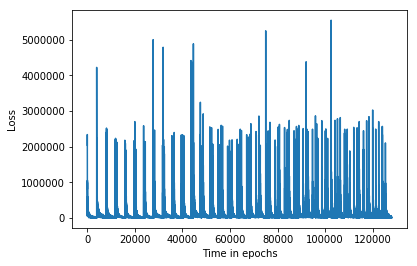

In [41]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = SGDClassifier(max_iter=1000,verbose=1,n_jobs=-1)
clf.fit(X_train,y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot( loss_list)
#plt.savefig("warmstart_plots/pure_SGD.png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

In [23]:
reg.score(X_test,y_test)

0.8349032446855393

In [24]:
y_pred = reg.predict(X_test)

In [25]:
metrics.mean_squared_error(y_test,y_pred)

10705377.084964203

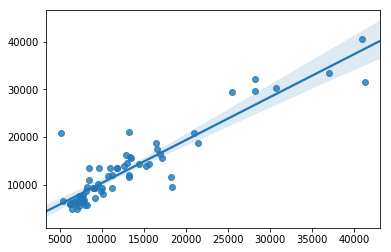

In [26]:
sns.regplot(y_test,y_pred)

In [27]:
y_test[0:10]

array([30760, 13207,  9549, 11850, 28248,  7799,  7788,  9258, 10198,
        7775])

In [28]:
y_pred[0:10]

array([30355.19458055, 21183.70413204, 10204.42795166, 13608.85711426,
       29608.91106588,  6341.91988355,  6828.09855346,  7343.798717  ,
        8161.07258909,  7876.44536124])

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

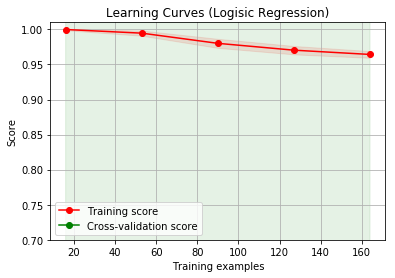

In [30]:
# Plotting for Logistic Regression
title = "Learning Curves (Logisic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, df_dummy, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)



In [62]:
X = data['engine-size']
X.shape
X = X.

(205,)

In [56]:
reg = LinearRegression()
reg.fit(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[130 130 152 109 136 136 136 136 131 131 108 108 164 164 164 209 209 209
  61  90  90  90  90  98  90  90  90  98 122 156  92  92  79  92  92  92
  92 110 110 110 110 110 110 111  90  90 119 258 258 326  91  91  91  91
  91  70  70  70  80 122 122 122 122 122 122 140 134 183 183 183 183 234
 234 308 304 140  92  92  92  98 110 122 156 156 156 122 122 110 110  97
 103  97  97  97  97  97  97  97  97 120 120 181 181 181 181 181 181 120
 152 120 152 120 152 120 152 120 152 134  90  98  90  90  98 122 156 151
 194 194 194 203 132 132 121 121 121 121 121 121  97 108 108 108 108 108
 108 108 108 108 108 108  92  92  92  92  92  92  98  98 110 110  98  98
  98  98  98  98  98 146 146 146 146 146 146 122 110 122 122 122 171 171
 171 161  97 109  97 109 109  97 109 109 109 136  97 109 141 141 141 141
 130 130 141 141 173 145 141].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [53]:
reg.score(X,y)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.